In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from sklearn.decomposition import PCA
from IPython.display import display
from matplotlib.backends.backend_pdf import PdfPages
import os

In [2]:
files = glob.glob("miRNAs_expressed_all_samples_28_02_2022_t*.csv")
sort_i = np.argsort([file.strip("miRNAs_expressed_all_samples_28_02_2022_t_10_546") for file in files])
files = [files[i] for i in sort_i]

In [4]:
dfs = []
for file in files:
    print(file)
    dfs.append(pd.read_csv(file, sep ="\t").iloc[:,:3])

miRNAs_expressed_all_samples_28_02_2022_t_10_54_06JMS_EG_sRNA_S5_L001_R1_piRNA_removed.csv
miRNAs_expressed_all_samples_28_02_2022_t_10_54_06JMS_FC1_sRNA_S6_L001_R1_piRNA_removed.csv
miRNAs_expressed_all_samples_28_02_2022_t_10_54_06JMS_MvL_sRNA_S4_L001_R1_piRNA_removed.csv
miRNAs_expressed_all_samples_28_02_2022_t_10_54_06KG_EG_sRNA_S9_L001_R1_piRNA_removed.csv
miRNAs_expressed_all_samples_28_02_2022_t_10_54_06KG_FC_sRNA_S8_L001_R1_piRNA_removed.csv
miRNAs_expressed_all_samples_28_02_2022_t_10_54_06KG_MvL1_sRNA_S7_L001_R1_piRNA_removed.csv
miRNAs_expressed_all_samples_28_02_2022_t_10_54_06KGplus_EG1_sRNA_S10_L001_R1_piRNA_removed.csv
miRNAs_expressed_all_samples_28_02_2022_t_10_54_05KGplus_FC_sRNA_S11_L001_R1_piRNA_removed.csv
miRNAs_expressed_all_samples_28_02_2022_t_10_54_05KGplus_MvL_sRNA_S12_L001_R1_piRNA_removed.csv


In [5]:
JEG =  dfs[0]
JFC = dfs[1]
JMV = dfs[2]
KEG = dfs[3]
KFC = dfs[4]
KMV = dfs[5]
AEG = dfs[6]
AFC = dfs[7]
AMV = dfs[8]

In [6]:
miRNAs = pd.concat([JEG[["#miRNA","precursor","read_count"]],JFC["read_count"],JMV["read_count"],KEG["read_count"],KFC["read_count"],KMV["read_count"],AEG["read_count"],AFC["read_count"],AMV["read_count"]],axis=1)
miRNAs.columns = [i for i in range(0,len(miRNAs.columns))]
miRNAs.index = miRNAs[0]
miRNAs = miRNAs.drop(columns=[0,1])
miRNAs = miRNAs[~miRNAs.index.duplicated(keep="first")].sort_index()

In [51]:
miRNAs = miRNAs.apply(pd.to_numeric)
miRNAs_Zeros_removed = miRNAs.T.loc[:, (miRNAs.T != 0).any(axis=0)]
data_GDA = miRNAs_Zeros_removed.T

In [8]:
# normalization counts per million
data_GDA = (data_GDA * 1e6) / data_GDA.sum(axis=0) 
data_GDA = data_GDA.T.sort_index(axis=1)
display(data_GDA)

,aae-bantam-3p,aae-miR-1,aae-miR-10,aae-miR-100,aae-miR-11-3p,aae-miR-12-5p,aae-miR-124,aae-miR-125-5p,aae-miR-13-3p,aae-miR-13-5p,...,tca-miR-981,tca-miR-993-3p,tca-miR-993-5p,tca-miR-9a-3p,tca-miR-9a-5p,tca-miR-9b-3p,tca-miR-9c-5p,tca-miR-9d-5p,tca-miR-9e-5p,tca-miR-iab-4-5p
2,1.127817,12511.018266,536.117919,4.251002,0.00000,6.564473,0.000000,31.029426,0.809715,0.000000,...,0.115674,0.000000,0.144592,167.235014,11633.808008,1.821858,0.144592,0.086755,2.458063,0.028918
3,2.330014,12651.104345,512.311913,5.126032,0.00000,6.582291,0.000000,40.017997,0.466003,0.000000,...,0.000000,0.174751,0.058250,162.984506,11889.131392,1.980512,0.116501,0.116501,2.796017,0.058250
4,1.160730,13163.560108,631.123578,5.458570,0.00000,5.364456,0.188227,32.343593,1.066617,0.031371,...,0.000000,0.125484,0.596051,167.866700,11073.367159,2.572429,0.125484,0.125484,2.227347,0.470566
5,1.113148,16379.132517,464.460849,3.756873,0.00000,8.905181,0.000000,33.672716,1.043576,0.000000,...,0.069572,0.069572,0.347859,177.616619,7806.504330,1.182719,0.000000,0.139143,1.252291,0.417430
6,0.774352,14268.681483,545.298943,3.975009,0.15487,8.724370,0.000000,32.161435,1.548705,0.000000,...,0.000000,0.671105,0.619482,169.066935,10339.359412,2.839292,0.361364,0.051623,1.497081,0.206494
7,0.867568,15421.718682,633.324441,3.181082,0.00000,8.634365,0.000000,20.986876,1.445946,0.000000,...,0.000000,0.123938,0.661004,202.804285,9812.232317,2.644016,0.082625,0.000000,1.859074,0.000000
8,0.855447,15788.575068,472.005234,5.484922,0.00000,7.548058,0.000000,35.123630,1.006408,0.000000,...,0.000000,0.150961,0.201282,150.961162,8751.872736,1.660573,0.251602,0.050320,1.408971,0.301922
9,1.452305,12065.422393,352.580119,3.102652,0.00000,11.948512,0.000000,26.999676,0.990208,0.000000,...,0.000000,0.132028,0.594125,195.335063,13254.926451,2.838597,0.264056,0.066014,2.706569,0.132028
10,1.203023,14382.240065,643.761840,4.571489,0.00000,10.682847,0.000000,28.920681,0.721814,0.000000,...,0.000000,0.096242,0.577451,164.958558,10277.476367,1.251144,0.096242,0.000000,1.972958,0.240605


In [9]:
# PCA using sklearn
values = data_GDA.values
pca = PCA(n_components=5)
principal_components_GDA = pca.fit_transform(values)
explained_GDA = pca.explained_variance_ratio_

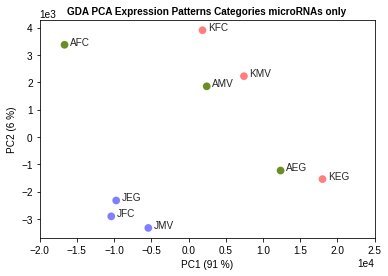

In [10]:

col_names = ["JEG","JFC","JMV","KEG","KFC","KMV","AEG","AFC","AMV"]
# Projections
%matplotlib inline
plt.title("GDA PCA Expression Patterns Categories microRNAs only", weight="bold", size="medium")
plt.style.use("seaborn-ticks")
plt.scatter(principal_components_GDA[:3,0], principal_components_GDA[:3,1],label="Naturally -Wol",s=60,c="#0000FF80",edgecolors='none')
plt.scatter(principal_components_GDA[3:6,0], principal_components_GDA[3:6,1],label="Wol Infected",s=60,c="#FF000080",edgecolors='none')
plt.scatter(principal_components_GDA[6:9,0], principal_components_GDA[6:9,1],label="Artificially -Wol",c="#6B8E23",s=60, edgecolors='none')
plt.ticklabel_format(useOffset=False,style="sci",scilimits=(0,0))
plt.xlabel(f"PC1 ({round(100*(explained_GDA[0]))} %)")
plt.ylabel(f"PC2 ({round(100*explained_GDA[1])} %)")
plt.xlim(-2.0e4,2.5e4)
for i, txt in enumerate(col_names):
    if i < 3:
        plt.annotate(txt, (principal_components_GDA[i,0]+700, principal_components_GDA[i,1]),size="medium")
    elif 2 < i >6:
        plt.annotate(txt,(principal_components_GDA[i,0]+700, principal_components_GDA[i,1]),size="medium")
    else:
        plt.annotate(txt,(principal_components_GDA[i,0]+700, principal_components_GDA[i,1]),size="medium")


In [11]:
# Reading in mirdeep2 novel predicted microRNAs output
files_novel = glob.glob("result*.csv")
sort_i = np.argsort([file.strip("result_28_02_2022_t_10_54_056") for file in files_novel])
files_novel = [files_novel[i] for i in sort_i]

In [12]:
# Parsing mirdeep2 output
miRNAs_novel = []
to_fasta = []
for file in files_novel:
    with open(file, "r") as f:
        lines = f.readlines()
        start = 0
        end = 0
        for i,line in enumerate(lines):
            if line.startswith("novel miRNAs predicted by miRDeep2"):
                start += i+1
            elif line.startswith("mature miRBase miRNAs detected by miRDeep2\n"):
                end += i-4
            else:
                pass
        novel = pd.read_csv(file,skiprows=start,skip_blank_lines=False,nrows=end-start, sep="\t")
        novel = novel[(novel["miRDeep2 score"] > 1) & (novel["significant randfold p-value"] == "yes") & (novel["rfam alert"] == "-") & (novel["total read count"] > 10 )]
        to_fasta.append(novel[["provisional id", "consensus mature sequence"]])
        miRNAs_novel.append(novel[["provisional id", "mature read count"]])

In [13]:
# Making new fasta file for storage of novel predicted RNAs
os.system("touch GDA_novel_miRNAs_new.fasta")
for s,name in zip(to_fasta, col_names):
    s["provisional id"] = name + "_" + s["provisional id"].astype(str)
    s["consensus mature sequence"] = s.loc[:,"consensus mature sequence"].str.upper()
    s["consensus mature sequence"] = s.loc[:,"consensus mature sequence"].str.replace("U","T")
    to_save = s[["provisional id", "consensus mature sequence"]]
    to_save.to_csv(f"{name}_novel_mature.csv", sep="\t", index=False,header=False)
    os.system(r'''awk '{ printf ">%s\n%s\n",$1,$2 }' ''' + "{} >> {}".format(f"{name}_novel_mature.csv"," GDA_novel_miRNAs_new.fasta"))
    os.system(f"rm {name}_novel_mature.csv")
# clustered GDA_novel_miRNAs_new.fasta to identify similar sequences in samples using dnaclust
# dnaclust -i GDA_novel_miRNAs_new.fasta -s 1 > clustered_miRNAs.csv

<ipython-input-13-8572d456d46f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s["provisional id"] = name + "_" + s["provisional id"].astype(str)
<ipython-input-13-8572d456d46f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s["consensus mature sequence"] = s.loc[:,"consensus mature sequence"].str.upper()
<ipython-input-13-8572d456d46f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [14]:
#read in DNAclust file
clustered = pd.read_csv("clustered_miRNAs.csv")
with open("clustered_miRNAs.csv") as c:
    lines = c.readlines()
    lines = "".join(lines)
    lines = lines.split("\n")
    clusters = [c.split("\t") for c in lines]
    clusters_filtered = []
    for c in clusters:
        cluster = []
        for ids in c:
            if ids == "":
                pass
            else:
                cluster.append(ids)
        clusters_filtered.append(cluster)    
#read in novel_miRNAs fasta file as dataframe
with open("GDA_novel_miRNAs.fasta") as unfiltered_fasta:
    lines = unfiltered_fasta.readlines()
    all_ids = lines[::2]
    reads = lines[1::2]
    seqs = pd.DataFrame({"IDs":all_ids, "Seqs": reads})
    seqs["IDs"] = seqs["IDs"].str.strip(">\n")
    seqs["Seqs"] = seqs["Seqs"].str.strip("\n")
    all_ids = list(seqs["IDs"])

In [15]:
# For easy parsing, dict with sample key avec corresponding df
novel_dict ={}
for name, df in zip(col_names, miRNAs_novel):
    renames = (list(name + "_" + df["provisional id"]))
    df["provisional id"] = renames
    novel_dict[name] = df
    

<ipython-input-15-ced899a0f535>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["provisional id"] = renames


In [38]:
clusters_filtered = [c for c in clusters_filtered if c]
for ids in clusters_filtered:
    consensus_id = ids[0]
    if len(ids) == 1:
        pass
    else:
        for i in range(0, len(ids)):
            name = ids[i].split("_")[0]
            x = ids[i]
            df = novel_dict[name]
            df.loc[df["provisional id"] == x,"provisional id"] = consensus_id
            df = df.drop_duplicates(subset=["provisional id"])
            novel_dict[name] = df

In [42]:
df_novel_all = pd.DataFrame(columns=["provisional id"])
for name in col_names:
    novel_dict[name] = novel_dict[name].rename(columns={"mature read count":name})
    df_novel_all = pd.merge(df_novel_all,novel_dict[name],on="provisional id" ,how="outer")
df_novel_all = df_novel_all.fillna(0)
df_novel_all.index = df_novel_all["provisional id"]
df_novel_all = df_novel_all.drop(columns=["provisional id"])
df_novel_all.head()

,JEG,JFC,JMV,KEG,KFC,KMV,AEG,AFC,AMV
provisional id,,,,,,,,,
AMV_tig00000790_34440,68362.0,44237.0,61336.0,18890.0,27858.0,31150.0,30250.0,28832.0,30788.0
JFC_tig00000860_39784,43638.0,20261.0,42708.0,14406.0,25946.0,41415.0,22831.0,25996.0,30674.0
AFC_tig00001059_46216,2040.0,920.0,1575.0,0.0,996.0,1388.0,1378.0,889.0,954.0
JFC_tig00000899_41060,1497.0,589.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AFC_tig00000103_17968,1099.0,733.0,1108.0,321.0,411.0,457.0,589.0,491.0,570.0


In [52]:
miRNAs_Zeros_removed = miRNAs_Zeros_removed.T
miRNAs_Zeros_removed.columns = col_names
miRNAs_ALL = pd.concat([miRNAs_Zeros_removed,df_novel_all])
miRNAs_ALL.to_csv("GDA_all_miRNA_counts_raw.csv", sep ="\t")
miRNAs_ALL.head()

,JEG,JFC,JMV,KEG,KFC,KMV,AEG,AFC,AMV
aae-bantam-3p,39.0,40.0,37.0,16.0,15.0,21.0,17.0,22.0,25.0
aae-miR-1,432632.0,217185.0,419608.0,235428.0,276399.0,373292.0,313761.0,182771.0,298877.0
aae-miR-10,18539.0,8795.0,20118.0,6676.0,10563.0,15330.0,9380.0,5341.0,13378.0
aae-miR-100,147.0,88.0,174.0,54.0,77.0,77.0,109.0,47.0,95.0
aae-miR-11-3p,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0


In [54]:
miRNAs_ALL.columns = [i for i in range(0,len(miRNAs_ALL.columns))]
miRNAs_ALL = miRNAs_ALL[~miRNAs_ALL.index.duplicated(keep="first")].sort_index()

In [55]:
miRNAs_ALL = miRNAs_ALL.apply(pd.to_numeric)
miRNAs_ALL_Zeros_removed = miRNAs_ALL.T.loc[:, (miRNAs_ALL.T != 0).any(axis=0)]
data_GDA = miRNAs_ALL_Zeros_removed.T

In [56]:
# normalization counts per million
data_GDA = (data_GDA * 1e6) / data_GDA.sum(axis=0) 
data_GDA = data_GDA.T.sort_index(axis=1)
display(data_GDA)

,AEG_tig00000008_896,AEG_tig00000014_2065,AEG_tig00000016_2312,AEG_tig00000025_4381,AEG_tig00000042_9787,AEG_tig00000043_10785,AEG_tig00000045_10974,AEG_tig00000071_12465,AEG_tig00000072_12668,AEG_tig00000096_17335,...,tca-miR-981,tca-miR-993-3p,tca-miR-993-5p,tca-miR-9a-3p,tca-miR-9a-5p,tca-miR-9b-3p,tca-miR-9c-5p,tca-miR-9d-5p,tca-miR-9e-5p,tca-miR-iab-4-5p
0,0.0000,25.768664,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.114655,0.000000,0.143318,165.762160,11531.347981,1.805813,0.143318,0.085991,2.436414,0.028664
1,0.0000,21.025058,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.173283,0.057761,161.615695,11789.281552,1.963879,0.115522,0.115522,2.772535,0.057761
2,0.0000,20.790500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.124494,0.591347,166.541861,10985.973882,2.552127,0.124494,0.124494,2.209769,0.466853
3,0.0000,17.625352,4.216261,0.000000,0.000000,0.00000,0.000000,0.000000,4.354499,0.000000,...,0.069119,0.069119,0.345595,176.460879,7755.707918,1.175023,0.000000,0.138238,1.244143,0.414714
4,0.0000,13.885913,0.000000,2.715695,0.000000,0.00000,0.000000,0.000000,3.176851,0.000000,...,0.000000,0.666114,0.614874,167.809471,10262.458623,2.818174,0.358677,0.051240,1.485946,0.204958
5,0.0000,22.848498,1.965462,2.333986,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.122841,0.655154,201.009453,9725.393407,2.620616,0.081894,0.000000,1.842621,0.000000
6,1.7995,19.394607,4.348791,2.399333,3.598999,6.79811,8.297693,1.699527,5.198555,6.348235,...,0.000000,0.149958,0.199944,149.958304,8693.732708,1.649541,0.249931,0.049986,1.399611,0.299917
7,0.0000,23.149300,0.000000,4.904513,0.000000,0.00000,0.000000,0.000000,5.623841,0.000000,...,0.000000,0.130787,0.588542,193.499376,13130.361491,2.811921,0.261574,0.065394,2.681134,0.130787
8,0.0000,19.237723,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.095473,0.572835,163.639987,10195.324947,1.241143,0.095473,0.000000,1.957188,0.238681


In [57]:
# PCA using sklearn
values = data_GDA.values
pca = PCA(n_components=5)
principal_components_GDA = pca.fit_transform(values)
explained_GDA = pca.explained_variance_ratio_

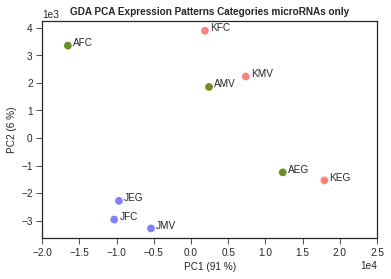

In [58]:

col_names = ["JEG","JFC","JMV","KEG","KFC","KMV","AEG","AFC","AMV"]
# Projections
%matplotlib inline
plt.title("GDA PCA Expression Patterns Categories microRNAs only", weight="bold", size="medium")
plt.style.use("seaborn-ticks")
plt.scatter(principal_components_GDA[:3,0], principal_components_GDA[:3,1],label="Naturally -Wol",s=60,c="#0000FF80",edgecolors='none')
plt.scatter(principal_components_GDA[3:6,0], principal_components_GDA[3:6,1],label="Wol Infected",s=60,c="#FF000080",edgecolors='none')
plt.scatter(principal_components_GDA[6:9,0], principal_components_GDA[6:9,1],label="Artificially -Wol",c="#6B8E23",s=60, edgecolors='none')
plt.ticklabel_format(useOffset=False,style="sci",scilimits=(0,0))
plt.xlabel(f"PC1 ({round(100*(explained_GDA[0]))} %)")
plt.ylabel(f"PC2 ({round(100*explained_GDA[1])} %)")
plt.xlim(-2.0e4,2.5e4)
for i, txt in enumerate(col_names):
    if i < 3:
        plt.annotate(txt, (principal_components_GDA[i,0]+700, principal_components_GDA[i,1]),size="medium")
    elif 2 < i >6:
        plt.annotate(txt,(principal_components_GDA[i,0]+700, principal_components_GDA[i,1]),size="medium")
    else:
        plt.annotate(txt,(principal_components_GDA[i,0]+700, principal_components_GDA[i,1]),size="medium")
